In [3]:
# Установка необходимых библиотек
!pip install -q transformers datasets pandas

# Импорт библиотек
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [10]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) 
Token is valid (permission: fineGrained).
The token `Google Colab 1` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authent

In [4]:
# Определение путей к файлам
data_path = "./"
valid_file = data_path + "valid.csv"

import pandas as pd

# Загрузка данных
valid_path = "valid.csv"
train_path = "train.csv"

valid_data = pd.read_csv(valid_path)
train_data = pd.read_csv(train_path)

# Список меток классов
labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

# Функция для подсчета неопределенных строк (все метки равны 0)
def count_undefined_rows(data, labels):
    return data[(data[labels].sum(axis=1) == 0)].shape[0]

# Подсчет строк с неопределенными метками
undefined_valid = count_undefined_rows(valid_data, labels)
undefined_train = count_undefined_rows(train_data, labels)

undefined_valid, undefined_train

(0, 0)

In [3]:
# Функция для подсчета строк с метками, равными -1
def count_negative_rows(data, labels):
    return data[(data[labels] == -1).any(axis=1)].shape[0]

# Подсчет строк с метками, равными -1
negative_valid = count_negative_rows(valid_data, labels)
negative_train = count_negative_rows(train_data, labels)

negative_valid, negative_train

(0, 0)

In [5]:
valid_data

,text,anger,disgust,fear,joy,sadness,surprise,neutral
0,Это в Новом Орлеане?? Я действительно чувствую...,0,0,0,0,0,0,1
1,"Ты знаешь ответ, чувак, ты запрограммирован пе...",0,0,0,1,0,0,1
2,Мне никогда в жизни не было так грустно!,0,0,0,0,1,0,0
3,Экономика находится под жестким контролем и су...,0,0,0,1,0,0,1
4,Он мог бы легко взять настоящую камеру из зако...,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
5421,"Это довольно опасно, когда государство решает,...",0,0,1,0,0,0,0
5422,"Сегодня утром я подала на развод. Надеюсь, он ...",0,0,0,1,0,0,0
5423,"В последний раз, когда это случилось, я просто...",1,0,0,0,0,0,0
5424,"Терпеть не могу этого высокомерного придурка, ...",1,0,0,0,0,0,0


In [9]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=97487edb61075ef5b828700ae0d4759cb8bf6a0e25fdd2d42cf21bd2ab2ebaf9
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [1]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report
from googletrans import Translator

In [6]:
# Шаг 1: Перевод текста (если используется англоязычная модель)
translator = Translator()
def translate_text(text):
    try:
        return translator.translate(text, src='ru', dest='en').text
    except Exception as e:
        print(f"Ошибка перевода текста: {text}\n{e}")
        return text

valid_data['translated_text'] = valid_data['text'].apply(translate_text)

In [12]:
# Сохранение переведённого датасета в CSV
output_file = "valid_data_translated.csv"
valid_data.to_csv(output_file, index=False)

# Информация для пользователя
print(f"Датасет с переводом сохранён в файл: {output_file}")

Датасет с переводом сохранён в файл: valid_data_translated.csv


In [7]:
# Шаг 2: Тестирование моделей
def test_model(model_name, input_column):
    # Загрузка модели
    emotion_classifier = pipeline("text-classification", model=model_name, top_k=None)

    # Предсказания модели
    def predict_emotions(text):
        try:
            predictions = emotion_classifier(text)
            # Преобразуем в словарь вида {emotion: score}
            return {pred['label']: pred['score'] for pred in predictions[0]}
        except Exception as e:
            print(f"Ошибка предсказания для текста: {text}\n{e}")
            return {}

    valid_data['predictions'] = valid_data[input_column].apply(predict_emotions)

    # Создаем столбцы для каждой эмоции на основе предсказаний
    emotions = ['anger', 'disgust', 'fear', 'sadness', 'joy', 'surprise', 'neutral']
    for emotion in emotions:
        valid_data[f'pred_{emotion}'] = valid_data['predictions'].apply(lambda x: x.get(emotion, 0) > 0.5)

    # Рассчитываем метрики
    metrics = {}
    for emotion in emotions:
        metrics[emotion] = classification_report(valid_data[emotion], valid_data[f'pred_{emotion}'], output_dict=True)

    return metrics



In [4]:
from transformers import pipeline
from sklearn.metrics import classification_report
import pandas as pd

# Загрузка модели
model_name = "j-hartmann/emotion-english-distilroberta-base"
pipe = pipeline("text-classification", model=model_name, return_all_scores=True)

# Загрузка переведенного valid набора
valid_file = "/content/valid_data_translated.csv"
valid_data = pd.read_csv(valid_file)



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
valid_data

,text,anger,disgust,fear,joy,sadness,surprise,neutral,translated_text,predictions,pred_anger,pred_disgust,pred_fear,pred_sadness,pred_joy,pred_surprise,pred_neutral
0,Это в Новом Орлеане?? Я действительно чувствую...,0,0,0,0,0,0,1,Is it in New Orleans ??I really feel that this...,"{'surprise': 0.6387081146240234, 'neutral': 0....",False,False,False,False,False,True,False
1,"Ты знаешь ответ, чувак, ты запрограммирован пе...",0,0,0,1,0,0,1,"You know the answer, dude, you programmed to i...","{'anger': 0.7930143475532532, 'disgust': 0.087...",True,False,False,False,False,False,False
2,Мне никогда в жизни не было так грустно!,0,0,0,0,1,0,0,I have never been so sad in my life!,"{'sadness': 0.9806430339813232, 'surprise': 0....",False,False,False,True,False,False,False
3,Экономика находится под жестким контролем и су...,0,0,0,1,0,0,1,The economy is under tight control and is subs...,"{'neutral': 0.9479954838752747, 'disgust': 0.0...",False,False,False,False,False,False,True
4,Он мог бы легко взять настоящую камеру из зако...,0,0,0,1,0,0,0,He could easily take a real camera from a lega...,"{'neutral': 0.9497406482696533, 'surprise': 0....",False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,"Это довольно опасно, когда государство решает,...",0,0,1,0,0,0,0,This is quite dangerous when the state decides...,"{'fear': 0.48805686831474304, 'disgust': 0.257...",False,False,False,False,False,False,False
5422,"Сегодня утром я подала на развод. Надеюсь, он ...",0,0,0,1,0,0,0,This morning I filed for divorce.I hope he wil...,"{'sadness': 0.9658904671669006, 'fear': 0.0095...",False,False,False,True,False,False,False
5423,"В последний раз, когда это случилось, я просто...",1,0,0,0,0,0,0,"The last time it happened, I just said no and ...","{'neutral': 0.8188647031784058, 'anger': 0.051...",False,False,False,False,False,False,True
5424,"Терпеть не могу этого высокомерного придурка, ...",1,0,0,0,0,0,0,"I hate this arrogant moron, he is no better th...","{'disgust': 0.5214055180549622, 'anger': 0.413...",False,True,False,False,False,False,False


In [6]:
from transformers import pipeline
from sklearn.metrics import classification_report

# Инициализация модели
pipe = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", device=0)

# Генерация предсказаний с учётом всех строк
def get_predictions(texts):
    predictions = []
    for text in texts:
        model_output = pipe(text)  # Получаем предсказания для текста
        scores = {label["label"]: label["score"] for label in model_output}
        predictions.append(scores)
    return predictions

# Применяем предсказания к каждому тексту
valid_data["model_predictions"] = get_predictions(valid_data["translated_text"])

# Разворачиваем предсказания в отдельные столбцы
for emotion in ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]:
    valid_data[f"pred_{emotion}"] = valid_data["model_predictions"].apply(lambda x: x.get(emotion, 0))

# Определяем наиболее вероятную метку
valid_data["predicted"] = valid_data["model_predictions"].apply(lambda x: max(x, key=x.get))

# Сохраняем результаты в новый CSV-файл
output_file = "/content/valid_predictions_with_surprise.csv"
valid_data.to_csv(output_file, index=False)

print(f"Файл с предсказаниями сохранён: {output_file}")

# Анализ метрик
true_labels = valid_data[["anger", "disgust", "fear", "joy", "sadness", "neutral"]].values.argmax(axis=1)
pred_labels = valid_data[["pred_anger", "pred_disgust", "pred_fear", "pred_joy", "pred_sadness", "pred_surprise", "pred_neutral"]].values.argmax(axis=1)

# Рассчитываем метрики классификации
print("Классификационный отчёт:")
print(classification_report(true_labels, pred_labels, target_names=["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]))


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Файл с предсказаниями сохранён: /content/valid_predictions_with_surprise.csv
Классификационный отчёт:
              precision    recall  f1-score   support

       anger       0.43      0.20      0.27      1176
     disgust       0.09      0.67      0.15        82
        fear       0.36      0.66      0.47        97
         joy       0.88      0.35      0.50      2145
     sadness       0.41      0.50      0.45       296
    surprise       0.24      0.10      0.14      1630
     neutral       0.00      0.00      0.00         0

    accuracy                           0.26      5426
   macro avg       0.34      0.35      0.28      5426
weighted avg       0.54      0.26      0.33      5426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Генерация предсказаний без учета `surprise`
def get_predictions_without_surprise(texts):
    predictions = []
    for text in texts:
        model_output = pipe(text)  # Получаем предсказания для текста
        scores = {label["label"]: label["score"] for label in model_output}
        # Удаляем 'surprise' из предсказаний
        if "surprise" in scores:
            del scores["surprise"]
        predictions.append(scores)
    return predictions

# Применяем предсказания к каждому тексту
valid_data["model_predictions_no_surprise"] = get_predictions_without_surprise(valid_data["translated_text"])

# Разворачиваем предсказания в отдельные столбцы (без `surprise`)
for emotion in ["anger", "disgust", "fear", "joy", "sadness", "neutral"]:
    valid_data[f"pred_{emotion}"] = valid_data["model_predictions_no_surprise"].apply(lambda x: x.get(emotion, 0))

# Определяем наиболее вероятную метку из оставшихся или возвращаем 'neutral', если словарь пустой
valid_data["predicted"] = valid_data["model_predictions_no_surprise"].apply(
    lambda x: max(x, key=x.get) if x else "neutral"
)

# Сохраняем результаты в новый CSV-файл
output_file = "/content/valid_predictions_without_surprise.csv"
valid_data.to_csv(output_file, index=False)

print(f"Файл с предсказаниями сохранён: {output_file}")

# Анализ метрик
true_labels = valid_data[["anger", "disgust", "fear", "joy", "sadness", "neutral"]].values.argmax(axis=1)
pred_labels = valid_data[["pred_anger", "pred_disgust", "pred_fear", "pred_joy", "pred_sadness", "pred_neutral"]].values.argmax(axis=1)

# Рассчитываем метрики классификации
print("Классификационный отчёт (без `surprise`):")
print(classification_report(true_labels, pred_labels, target_names=["anger", "disgust", "fear", "joy", "sadness", "neutral"]))


Файл с предсказаниями сохранён: /content/valid_predictions_without_surprise.csv
Классификационный отчёт (без `surprise`):
              precision    recall  f1-score   support

       anger       0.40      0.41      0.40      1176
     disgust       0.09      0.67      0.15        82
        fear       0.36      0.66      0.47        97
         joy       0.88      0.35      0.50      2145
     sadness       0.41      0.50      0.45       296
     neutral       0.44      0.59      0.50      1630

    accuracy                           0.45      5426
   macro avg       0.43      0.53      0.41      5426
weighted avg       0.60      0.45      0.47      5426



In [ ]:
# Эмоции, используемые в модели
model_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]

# Предсказания модели
predictions = []
for text in valid_data["text"]:
    pred = pipe(text)
    scores = {label["label"]: label["score"] for label in pred[0]}
    predictions.append(max(scores, key=scores.get))  # Берем метку с максимальным значением

# Сравнение предсказаний с истинными метками
valid_data["predicted"] = predictions
print("Пример предсказаний:")
print(valid_data[["text", "predicted", "emotion"]].head())

# Рассчитаем метрики


In [1]:
# Проверка на пропущенные значения и преобразование текста в строки
filtered_df["dialog"] = filtered_df["dialog"].astype(str).fillna("")

# Теперь можно повторить операцию перевода или классификации
# Пример перевода первой строки для проверки
from transformers import MarianMTModel, MarianTokenizer

# Настройка модели перевода
model_name = "Helsinki-NLP/opus-mt-en-ru"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Пример перевода для проверки
test_text = filtered_df["dialog"].iloc[0]
inputs = tokenizer(test_text, return_tensors="pt", padding=True, truncation=True)
translated = model.generate(**inputs)
translated_text = tokenizer.batch_decode(translated, skip_special_tokens=True)

translated_text


NameError: name 'filtered_df' is not defined

In [11]:
# Шаг 3: Выбор моделей для тестирования
models = {
    "angl_model_1": "bhadresh-savani/distilbert-base-uncased-emotion",
    "angl_model_2": "j-hartmann/emotion-english-distilroberta-base",
    "rus_model_1": "cointegrated/rubert-tiny-emotion-detection"
}

# Сравнение моделей
results = {}
for model_name, model_path in models.items():
    print(f"Тестирование модели: {model_name}")
    if "angl" in model_name:
        metrics = test_model(model_path, "translated_text")
    else:
        metrics = test_model(model_path, "text")
    results[model_name] = metrics

# Сохраняем результаты в файл
for model_name, metrics in results.items():
    with open(f"{model_name}_metrics.txt", "w") as f:
        f.write(str(metrics))

print("Тестирование завершено. Метрики сохранены в файлы.")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Тестирование модели: angl_model_1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Тестирование модели: angl_model_2


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Тестирование модели: rus_model_1


OSError: cointegrated/rubert-tiny-emotion-detection is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

# roberta-base

In [4]:
# Загрузка предобученной модели и токенизатора
model_name = "badmatr11x/roberta-base-emotions-detection-from-text"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()  # Устанавливаем режим предсказания

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
           

In [11]:
# Проверяем метки модели и данных
def check_label_alignment(model, labels):
    model_labels = model.config.id2label
    model_label_order = [model_labels[i] for i in range(len(model_labels))]

    if model_label_order == labels:
        print("Метки совпадают и находятся в правильном порядке!")
    else:
        print("Метки не совпадают или порядок неправильный!")
        print(f"Метки модели: {model_label_order}")
        print(f"Метки данных: {labels}")

# Вызываем функцию
check_label_alignment(model, labels)


Метки не совпадают или порядок неправильный!
Метки модели: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
Метки данных: ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']


In [12]:
# Исправляем порядок меток в данных
labels = [model.config.id2label[i] for i in range(len(model.config.id2label))]

# Проверяем снова
check_label_alignment(model, labels)


Метки совпадают и находятся в правильном порядке!


In [13]:
# Определение меток
labels = [model.config.id2label[i] for i in range(len(model.config.id2label))]
label2id = {label: idx for idx, label in enumerate(labels)}
id2label = {idx: label for idx, label in enumerate(labels)}

In [14]:
# Преобразование текста в тензоры для модели
def predict_emotions(texts, tokenizer, model):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return predictions

In [15]:
# Предсказания для validation датасета
texts = valid_data["text"].tolist()
predictions = predict_emotions(texts, tokenizer, model)
predicted_labels = torch.argmax(predictions, axis=1).numpy()

# Подготовка истинных меток
true_labels = []
for _, row in valid_data.iterrows():
    true_label = [label2id[label] for label in labels if row[label] == 1]
    true_labels.append(true_label[0] if true_label else -1)  # Если нет метки, оставляем -1

In [16]:
# Вычисление метрик
accuracy = accuracy_score(true_labels, predicted_labels)
weighted_avg = classification_report(true_labels, predicted_labels, target_names=labels, output_dict=True)["weighted avg"]

# Результаты
print(f"Accuracy: {accuracy:.4f}")
print(f"Weighted Average (F1): {weighted_avg['f1-score']:.4f}")


Accuracy: 0.2925
Weighted Average (F1): 0.1476


In [ ]:
for i in range(10):  # Проверяем первые 10 примеров
    print(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")


True: 6, Predicted: 4
True: 3, Predicted: 4
True: 4, Predicted: 4
True: 3, Predicted: 4
True: 3, Predicted: 4
True: 3, Predicted: 4
True: 0, Predicted: 4
True: 6, Predicted: 0
True: 3, Predicted: 4
True: 0, Predicted: 4


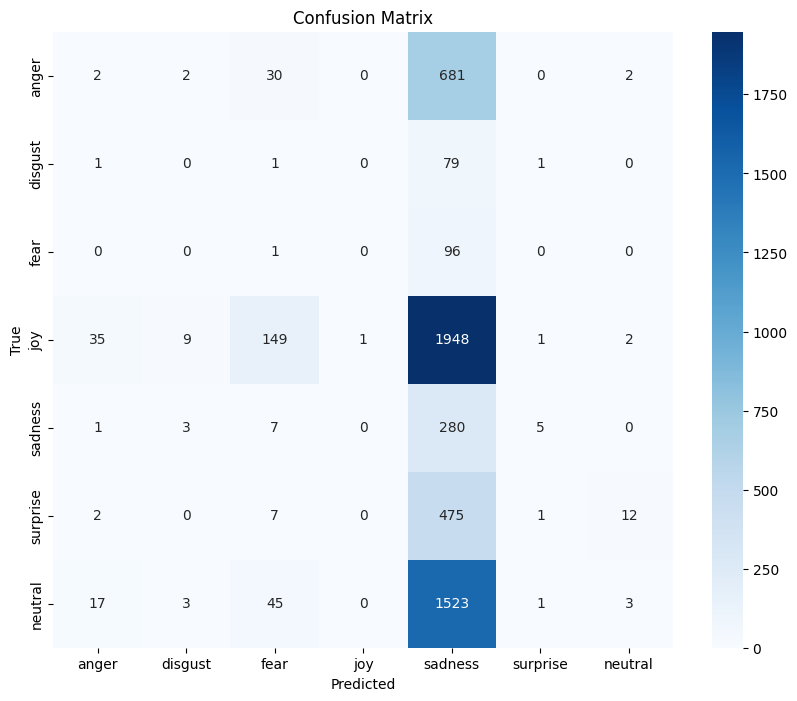

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels, labels=list(range(len(labels))))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
unique_true, counts_true = np.unique(true_labels, return_counts=True)
unique_pred, counts_pred = np.unique(predicted_labels, return_counts=True)

print("True Labels Distribution:")
for label, count in zip(unique_true, counts_true):
    print(f"{labels[label]}: {count}")

print("\nPredicted Labels Distribution:")
for label, count in zip(unique_pred, counts_pred):
    print(f"{labels[label]}: {count}")


True Labels Distribution:
anger: 717
disgust: 82
fear: 97
joy: 2145
sadness: 296
surprise: 497
neutral: 1592

Predicted Labels Distribution:
anger: 58
disgust: 17
fear: 240
joy: 1
sadness: 5082
surprise: 9
neutral: 19


In [ ]:
# Визуализация первых примеров
for idx in range(10):
    print(f"Текст: {valid_data['text'][idx]}")
    print(f"Истинный класс: {[labels[i] for i in range(len(labels)) if valid_data.iloc[idx][labels[i]] == 1]}")
    print(f"Предсказанный класс: {labels[predicted_labels[idx]]}\n")


In [ ]:
# ДООБУЧЕНИЕ

from transformers import AdamW
from torch.utils.data import Dataset, DataLoader
from datasets import load_metric

# Подготовка данных в формате PyTorch Dataset
class EmotionDataset(Dataset):
    def __init__(self, dataframe, tokenizer, labels, max_len):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.labels = labels
        self.max_len = max_len

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx]["text"]
        labels = self.dataframe.iloc[idx][self.labels].values.astype(float)

        inputs = self.tokenizer(
            text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors="pt"
        )
        return {
            "input_ids": inputs["input_ids"].squeeze(0),
            "attention_mask": inputs["attention_mask"].squeeze(0),
            "labels": torch.tensor(labels, dtype=torch.float),
        }

# Гиперпараметры
BATCH_SIZE = 16
EPOCHS = 3
MAX_LEN = 128
LEARNING_RATE = 2e-5

# Создаем DataLoader'ы
train_dataset = EmotionDataset(train_data, tokenizer, labels, MAX_LEN)
valid_dataset = EmotionDataset(valid_data, tokenizer, labels, MAX_LEN)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Определяем оптимизатор
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# Функция ошибки
criterion = torch.nn.BCEWithLogitsLoss()

# Функция для обучения одной эпохи
def train_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for batch in dataloader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(dataloader)

# Функция для валидации
def validate_epoch(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()

            predictions.extend(torch.sigmoid(outputs.logits).cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return total_loss / len(dataloader), predictions, true_labels

# Запуск обучения
for epoch in range(EPOCHS):
    print(f"Эпоха {epoch + 1}/{EPOCHS}")
    train_loss = train_epoch(model, train_dataloader, criterion, optimizer, device)
    val_loss, val_preds, val_labels = validate_epoch(model, valid_dataloader, criterion, device)

    print(f"Train Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

# Сохранение модели
model.save_pretrained("./fine_tuned_model")
tokenizer.save_pretrained("./fine_tuned_model")
print("Модель сохранена!")


In [ ]:
# Загрузка тестового датасета
test = load_dataset("csv", data_files={"test": "/content/test_without_answers.csv"})

# Токенизация тестового датасета
test = test.map(lambda examples: tokenizer(
    examples["text"],
    truncation=True,
    add_special_tokens=True,
    max_length=max_len,
    padding="max_length"
), batched=True)

# Преобразование меток в формате one-hot (если необходимо, иначе пропустите)
def one_hot_to_list(example):
    emotions = []
    for emotion in labels:
        emotions.append(example.get(emotion, 0))  # Проверка наличия ключа
    example["one_hot_labels"] = emotions
    return example

test = test.map(one_hot_to_list)

# Создание датасета и DataLoader для теста
test_dataset = EmotionDataset(test["test"])
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Получение предсказаний на тестовом датасете
outputs, _ = validation(model, criterion, test_dataloader)
outputs = np.array(outputs) >= 0.5  # Преобразование вероятностей в бинарные метки

# Загрузка исходного тестового файла для подготовки выходного файла
import pandas as pd

df = pd.read_csv("/content/test_without_answers.csv")

# Добавление предсказанных меток в DataFrame
df[labels] = outputs.astype(int)

# Добавление колонки 'id', если она необходима
df.insert(loc=0, column='id', value=np.arange(1, len(df) + 1))

# Удаление текста (опционально, если он не нужен в выходном файле)
df = df.drop(['text'], axis=1)

# Сохранение результатов в CSV-файл
df.to_csv("/content/submission.csv", index=False)

print("Результаты сохранены в файл: /content/submission.csv")
